In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
target = pd.read_csv('test.csv')

# EDA

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


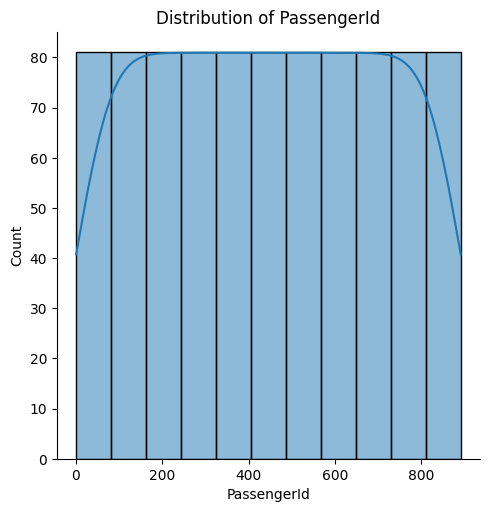

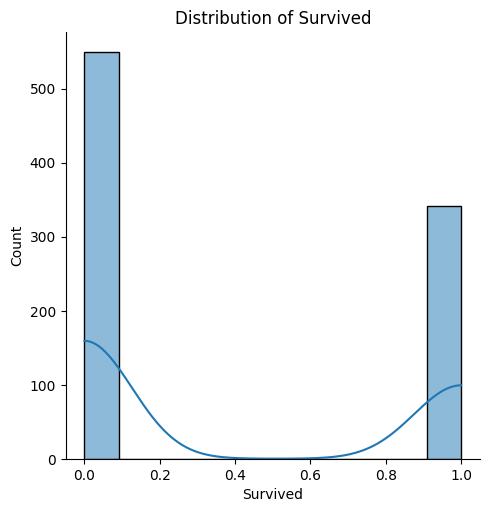

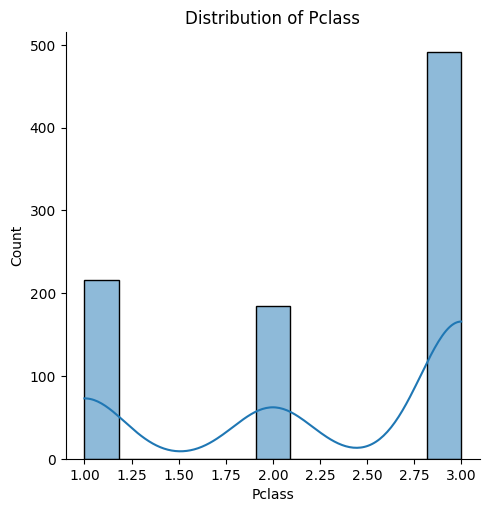

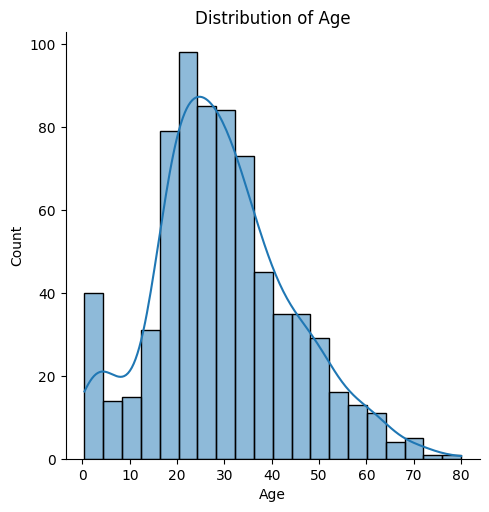

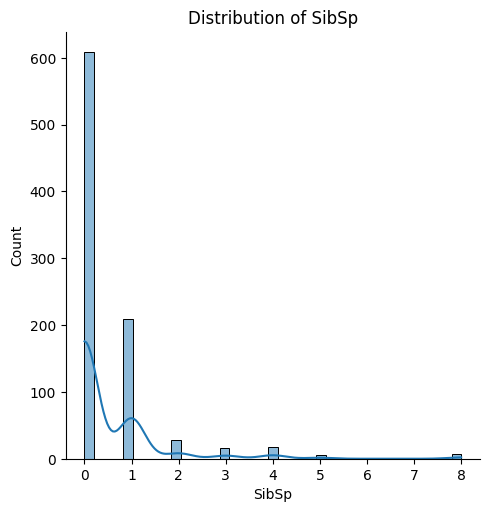

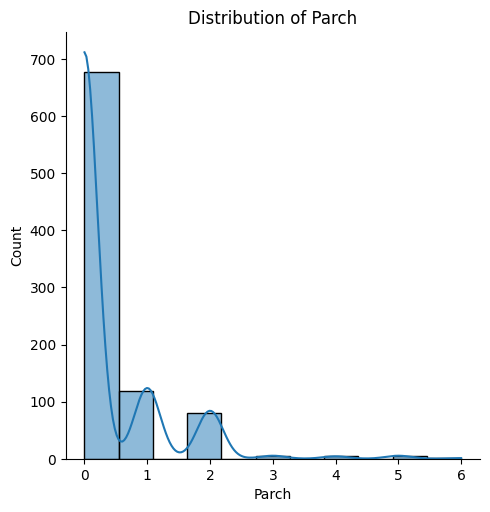

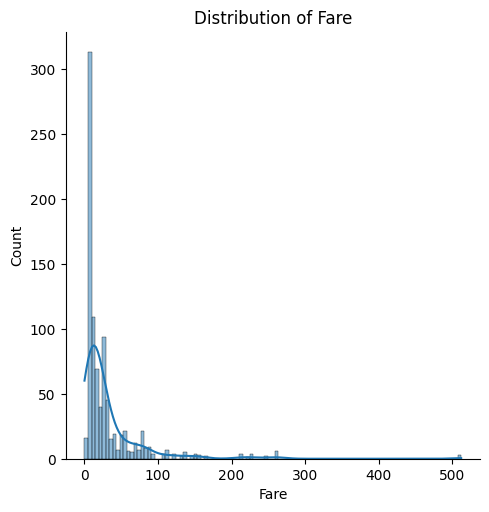

In [9]:
numeric_columns = train.select_dtypes(include='number').columns

for col in numeric_columns:
    sns.displot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

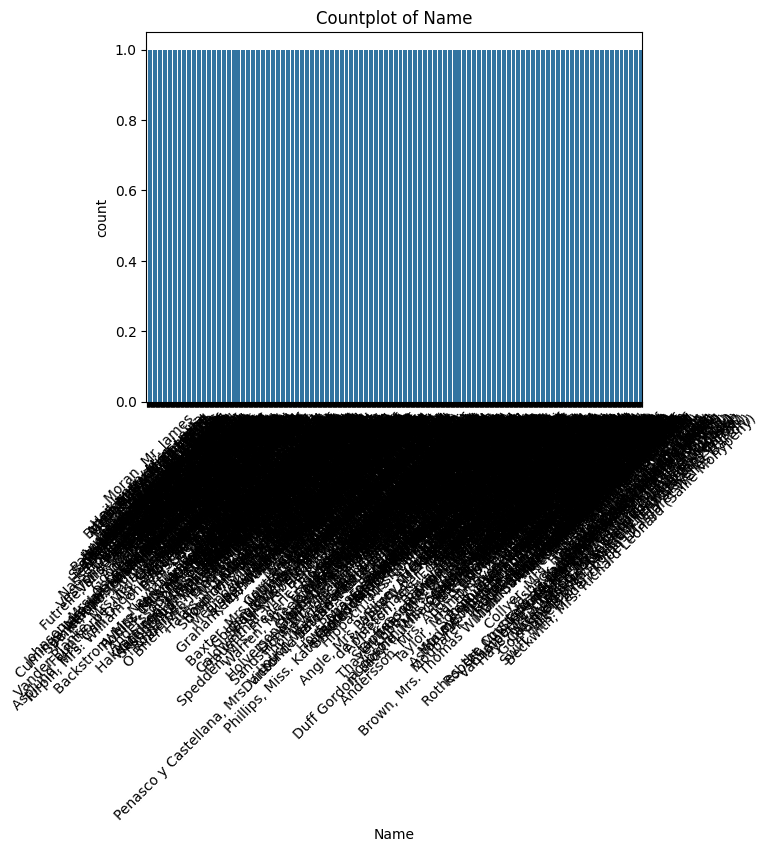

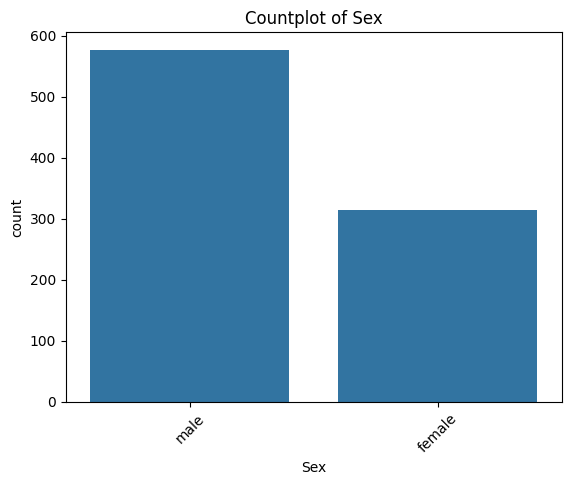

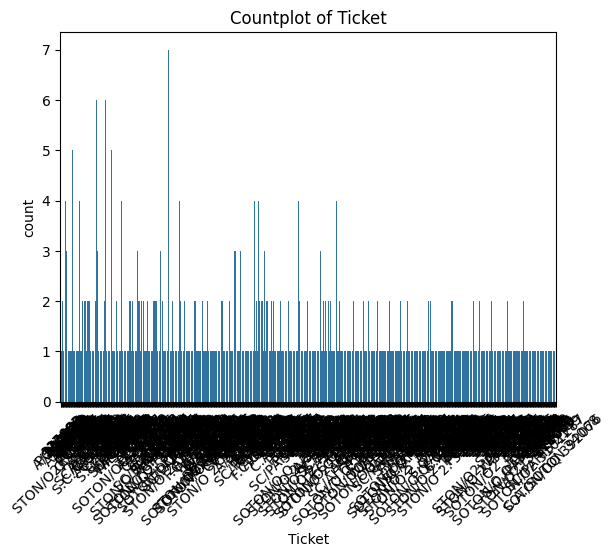

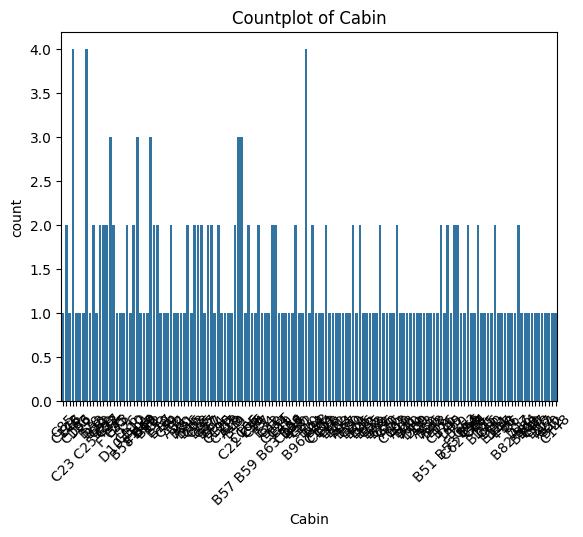

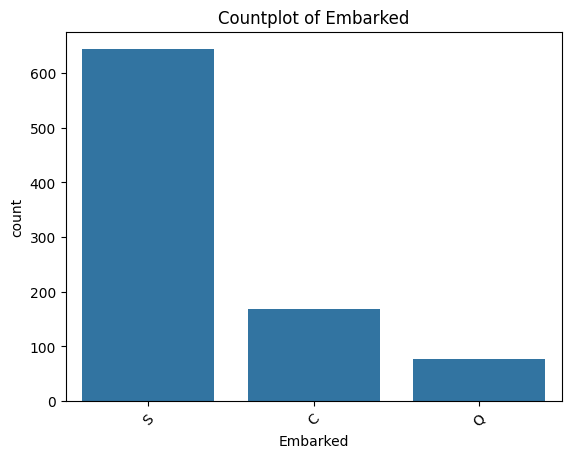

In [10]:
categorical_cols = train.select_dtypes(include='object').columns

for col in categorical_cols:
    sns.countplot(data=train, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

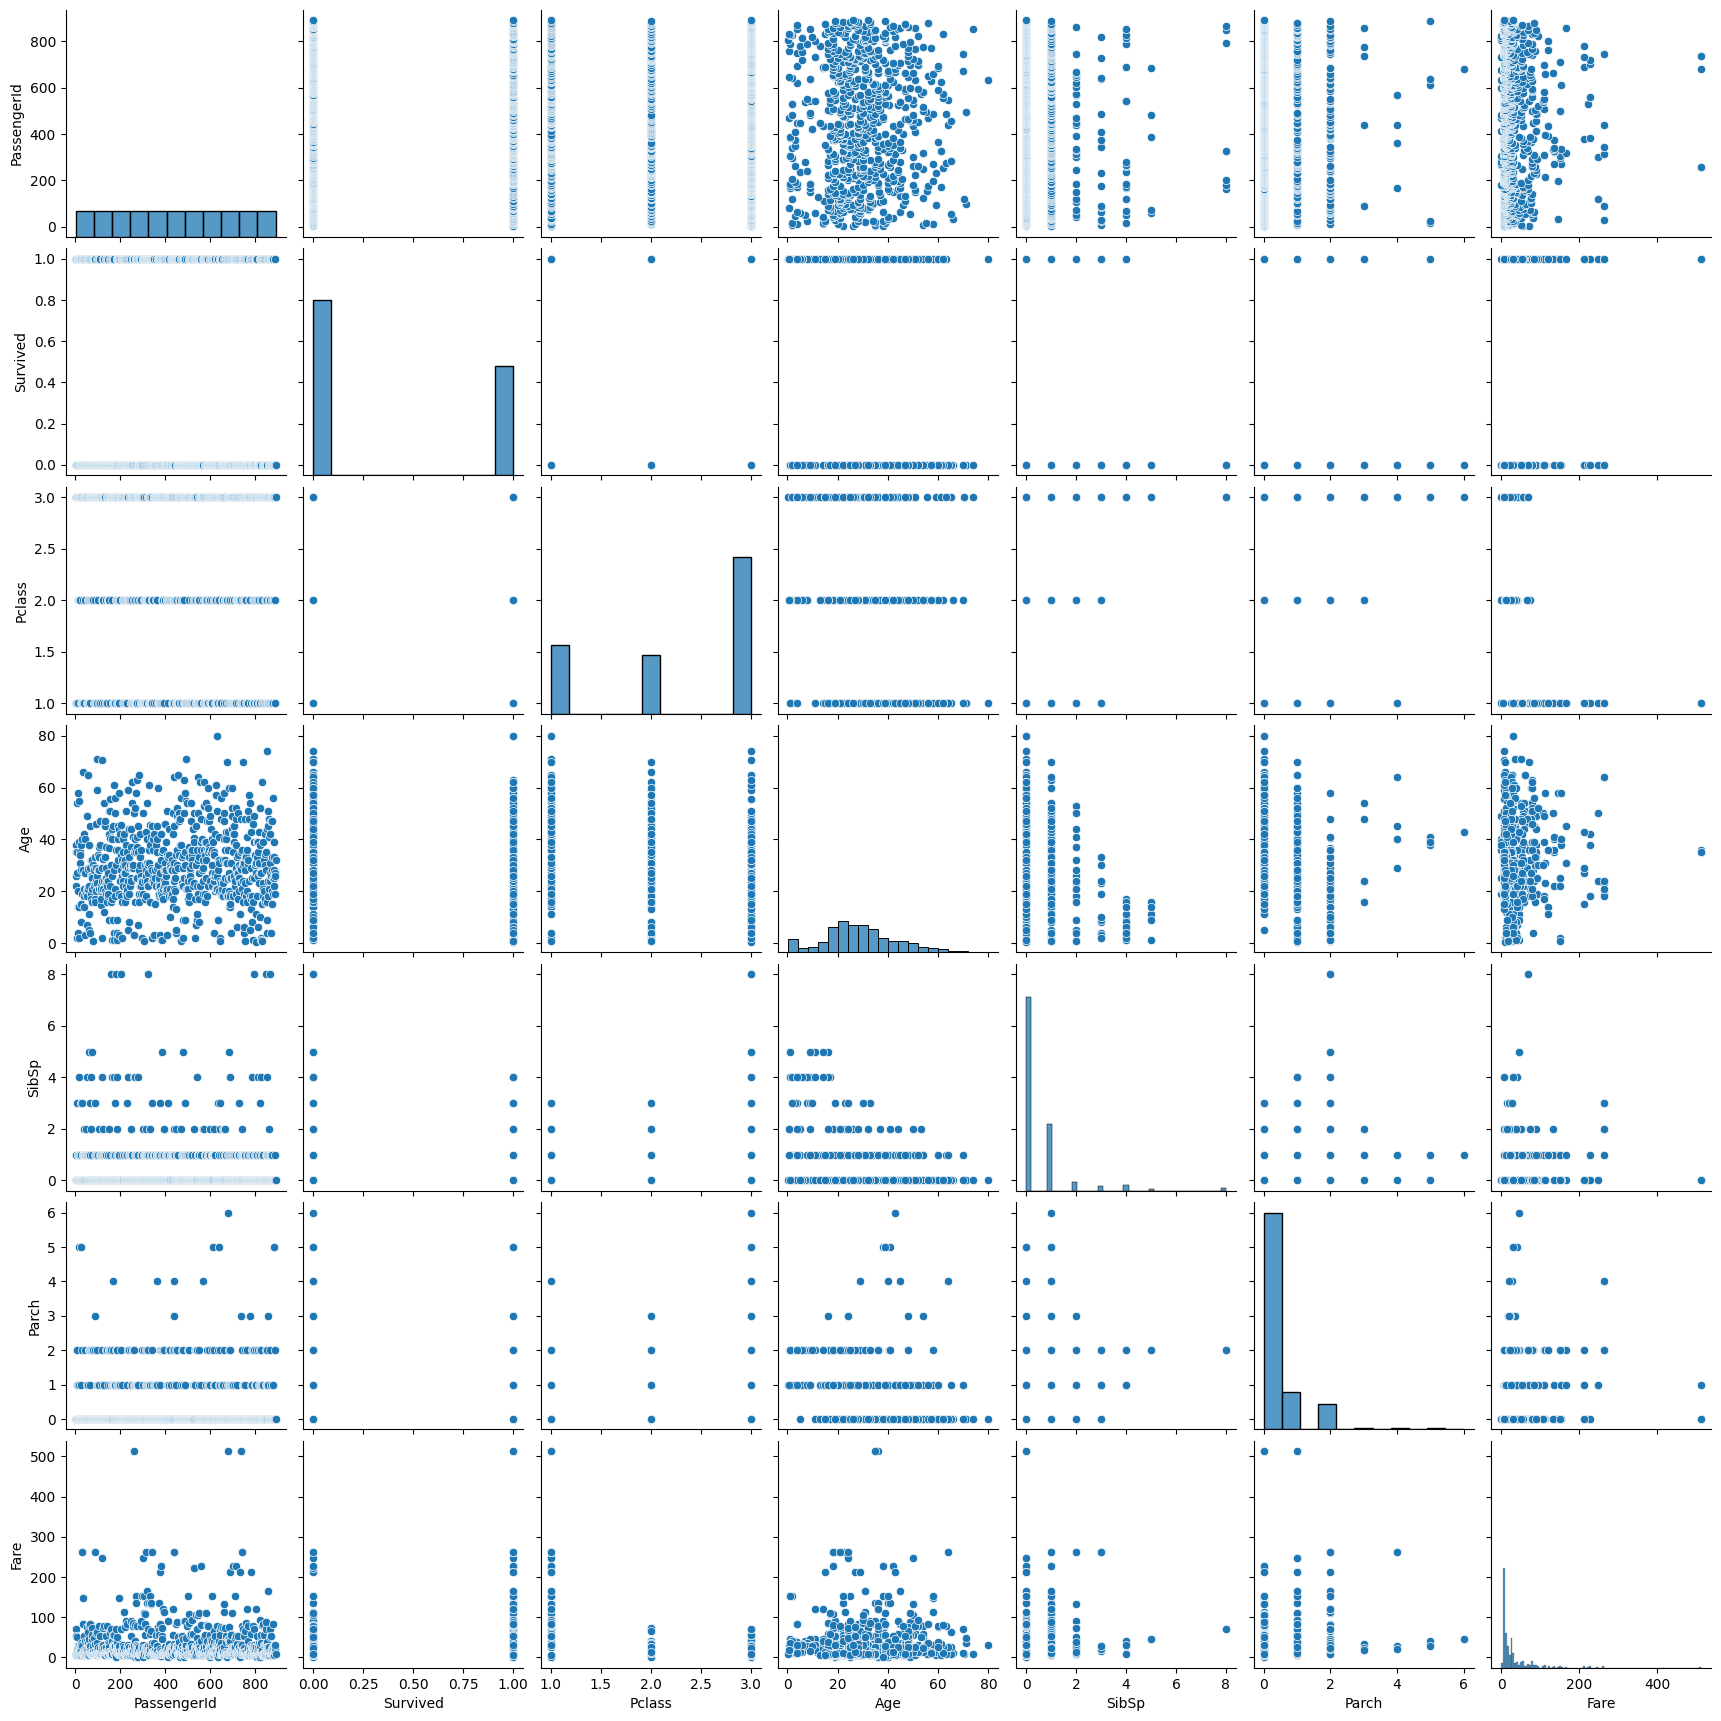

In [14]:
sns.pairplot(train[numeric_columns])
plt.show()

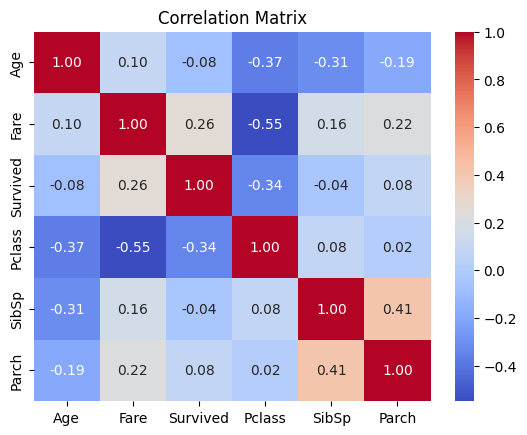

In [22]:
cols = ['Age', 'Fare', 'Survived', "Pclass", "SibSp", "Parch"]
sns.heatmap(train[cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [21]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Data cleaning and selection

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [34]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
cleaned = train.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket', 'Cabin']).dropna().reset_index(drop=True)
cleaned.shape

(712, 8)

In [82]:
train_encoded = pd.get_dummies(cleaned, columns=['Sex', 'Embarked'], drop_first=True)

In [83]:
train_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [89]:
X = cleaned.drop(columns=['Survived'])
y = cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_train.head())

(498, 7)
(214, 7)
     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
43        2  female   5.0      1      2  27.7500        S
42        3    male  28.5      0      0   7.2292        C
73        1    male  71.0      0      0  34.6542        C
167       3    male  24.0      0      0   7.0500        S
449       3    male  32.0      0      0   7.8542        S


# Model training

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [ ]:
model = LogisticRegression(
    penalty='l2',
    C=1,
    solver='liblinear',
    max_iter=10000
)

#model training
model.fit(X_train, y_train)

#model prediction
y_pred = model.predict(X_test)


Accuracy: 0.78
Precision: 0.79
Recall: 0.65
[[106  16]
 [ 32  60]]


### Model Evaluation

In [52]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
precision = metrics.precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
recall = metrics.recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.78
Precision: 0.79
Recall: 0.65
[[106  16]
 [ 32  60]]


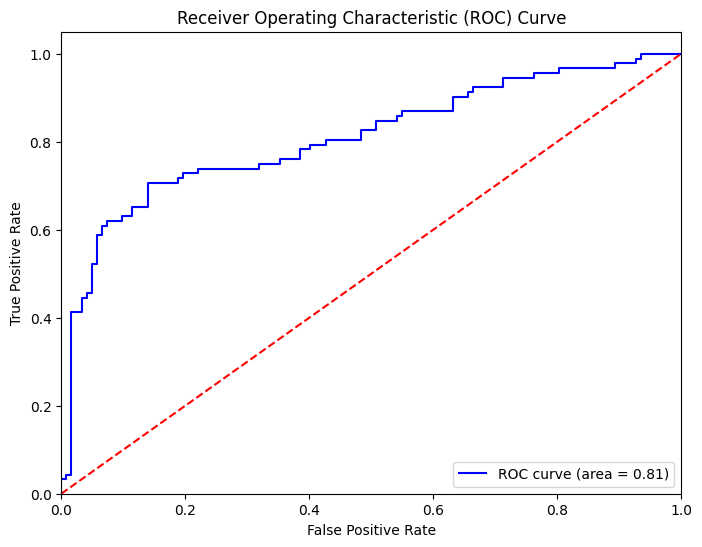

In [53]:
## ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Simple CART

In [140]:
from sklearn.tree import DecisionTreeClassifier
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(pd.get_dummies(cleaned, columns=['Sex', 'Embarked'], drop_first=True).drop(columns=['Survived']), pd.get_dummies(cleaned, columns=['Sex', 'Embarked'], drop_first=True)['Survived'], test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf= 5, criterion='gini', random_state=42)  # 'gini' = CART default
clf.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

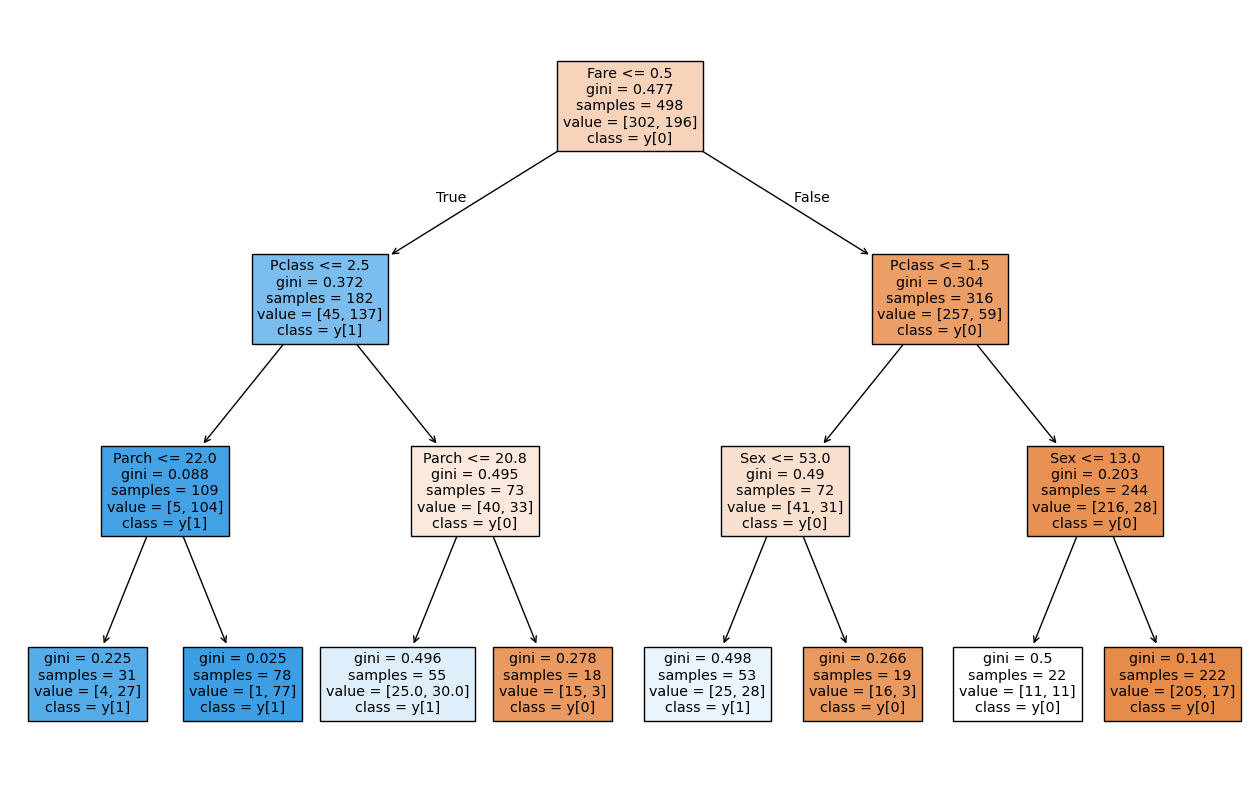

In [141]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()

In [142]:
# Model prediction with Decision Tree
y_pred_tree = clf.predict(X_test_encoded)
accuracy_tree = metrics.accuracy_score(y_test_encoded, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')
precision_tree = metrics.precision_score(y_test_encoded, y_pred_tree)
print(f'Decision Tree Precision: {precision_tree:.2f}')
recall_tree = metrics.recall_score(y_test_encoded, y_pred_tree)
print(f'Decision Tree Recall: {recall_tree:.2f}')
print(metrics.confusion_matrix(y_test_encoded, y_pred_tree))

Decision Tree Accuracy: 0.74
Decision Tree Precision: 0.68
Decision Tree Recall: 0.73
[[91 31]
 [25 67]]


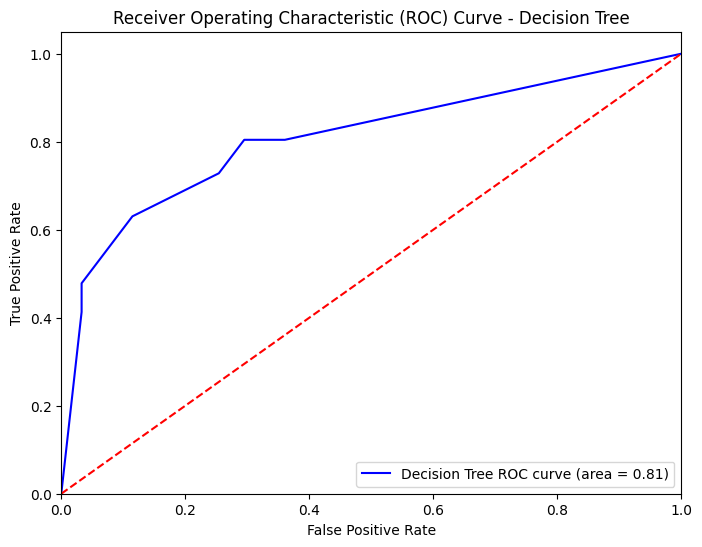

In [143]:
# ROC Curve for Decision Tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test_encoded, clf.predict_proba(X_test_encoded)[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', label=f'Decision Tree ROC curve (area = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

## CART Pipeline

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [90]:
# Automatically detect types
num_features = X_train.select_dtypes(include='number').columns.tolist()
cat_features = X_train.select_dtypes(include='object').columns.tolist()

print(f"Numeric features: {num_features}")
print(f"Categorical features: {cat_features}")


Numeric features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical features: ['Sex', 'Embarked']


In [91]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [99]:
# range from 1 to 10 in an increment of 1
list(range(1, 10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [203]:
param_grid = {
    'classifier__max_depth': [3, 5, 10, 15],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__min_samples_split': [2, 3, 4, 5],
    'classifier__min_samples_leaf': [1, 3, 5, 2, 8],
    'classifier__max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,  # 5-fold cross-validation
    scoring='roc_auc',  # or 'f1', 'roc_auc', etc.
    n_jobs=-1,  # use all CPU cores
    refit=True,  # refit the model with the best parameters
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=3; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=3; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__ma

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 10, 15],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 3, 5, 2, 8],
                         'classifier__min_samples_split': [2, 3, 4, 5]},
             scoring='roc_auc', verbose=2)

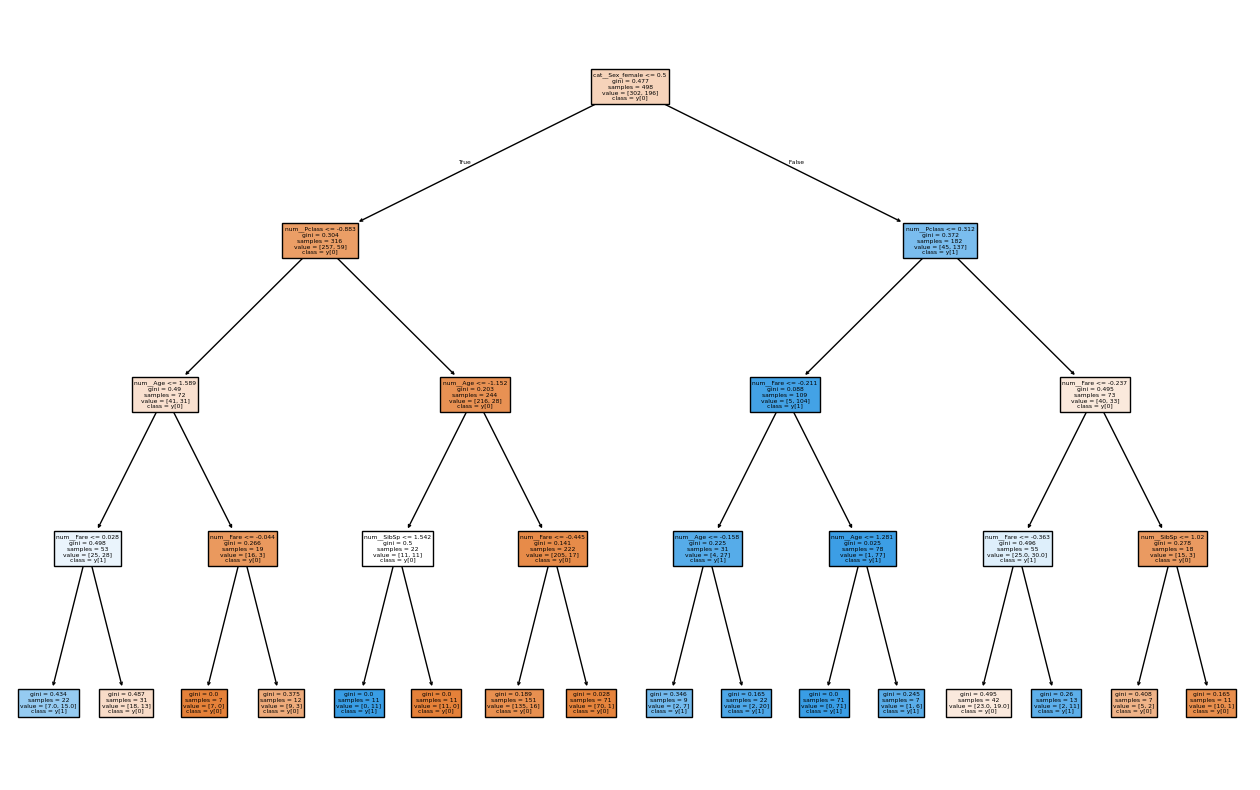

In [200]:
best_tree = grid_search.best_estimator_.named_steps['classifier']
preprocessor = grid_search.best_estimator_.named_steps['preprocessing']
plt.figure(figsize=(16, 10))
plot_tree(best_tree, feature_names=preprocessor.get_feature_names_out(), class_names=True, filled=True)
plt.show()


In [204]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid_search.best_score_)
best_pipeline = grid_search.best_estimator_
# Evaluate on test set
y_pred = grid_search.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__max_features': None, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}
Best cross-val accuracy: 0.8750108087731849
Test set accuracy: 0.7383177570093458


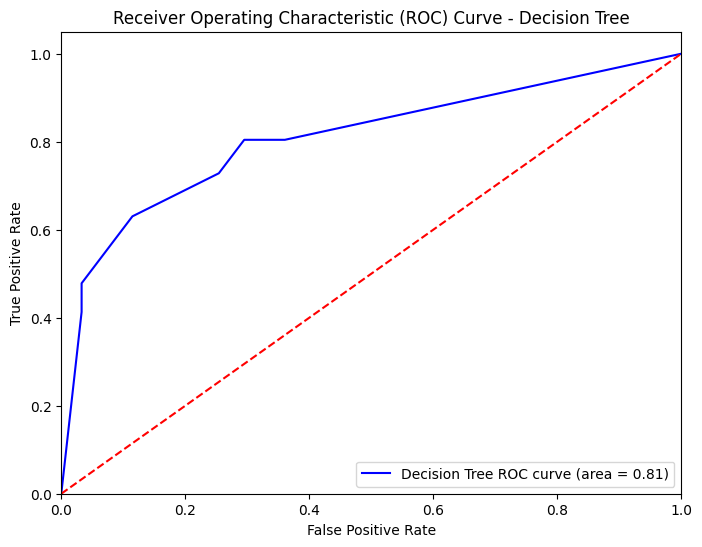

In [205]:
# Make sure X_test is the raw features (DataFrame)
probs = best_pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class

# ROC Curve for Decision Tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, probs)
roc_auc_tree = auc(fpr_tree, tpr_tree)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', label=f'Decision Tree ROC curve (area = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Make final prediction

In [211]:
submission_df = pd.read_csv("test.csv")
preds = grid_search.predict(submission_df)
output = pd.DataFrame({
    "PassengerId": submission_df["PassengerId"],
    "Survived": preds
})
output.to_csv("submission_CART.csv", index=False)